# Thera Bank Personal Loan Campaign

# Objective
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

# 1. Load Libraries and data

## 1.1 Import Libraries

In [274]:
%matplotlib inline 
import seaborn as sns 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 

## 1.2 Load Data

In [275]:
bank_data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [276]:
bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## 1.3 The target parameter, or the dependent parameter (y) is:
Personal Loan: Did this customer accept the personal loan offered in the last campaign?

## 1.4 The following is a list of possible independent variables (x):

•ID: Customer ID

•Age: Customer's age in completed years

•Experience: #years of professional experience

•Income: Annual income of the customer ($000)

•ZIP Code: Home Address ZIP code.

•Family: Family size of the customer

•CCAvg: Avg. spending on credit cards per month ($000)

•Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

•Mortgage: Value of house mortgage if any. ($000)

•Personal Loan: Did this customer accept the personal loan offered in the last campaign?

•Securities Account: Does the customer have a securities account with the bank?

•CD Account: Does the customer have a certificate of deposit (CD) account with the bank?

•Online: Does the customer use internet banking facilities?

•Credit card: Does the customer use a credit card issued by the bank?


## 1.5 Summary of the dataset

In [277]:
bank_data.shape # Let us explore the shape of the data

(5000, 14)

In [278]:
bank_data.describe() # statistical summary of the data. We found a negative -3 value on "Experience" dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [279]:
bank_data.info() # check number of columns, null values and datatype of the datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## 1.6 Check for missing data

In [280]:
bank_data.isnull().values.any() # Check any missing value, and we found out that there is none

False

 ## 1.7 Data imputation
 There are some data of the dataset with negative values. Data imputation is required to remove the negative values and replace them with estimated values.

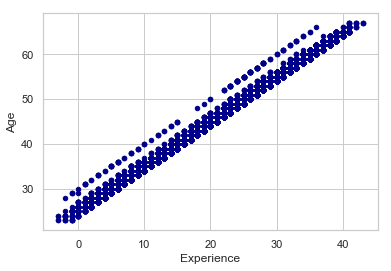

In [281]:
bank_data['Experience'] = bank_data['Experience'].astype(int)
bank_data.plot.scatter(x='Experience',
                      y='Age',
                      c='DarkBlue')

# 2. Distribution of Dataset

## 2.1 Understand unique values

In [282]:
list_of_unique_values = ([ print(f'Number of unique values for {column} is {len(bank_data[column].unique())}')  for column in bank_data.columns])

Number of unique values for ID is 5000
Number of unique values for Age is 45
Number of unique values for Experience is 47
Number of unique values for Income is 162
Number of unique values for ZIP Code is 467
Number of unique values for Family is 4
Number of unique values for CCAvg is 108
Number of unique values for Education is 3
Number of unique values for Mortgage is 347
Number of unique values for Personal Loan is 2
Number of unique values for Securities Account is 2
Number of unique values for CD Account is 2
Number of unique values for Online is 2
Number of unique values for CreditCard is 2


## 2.2 Number of people with zero mortgage

In [283]:
cus_with_zero_mortgage = bank_data[bank_data["Mortgage"]>0.0].shape[0]
percentage_of_zero_mortgage = round(cus_with_zero_mortgage/bank_data.shape[0]*100, 2)
print(f'Number of customers with zero mortgage is {cus_with_zero_mortgage}, a {percentage_of_zero_mortgage}% of the overall customer population')

Number of customers with zero mortgage is 1538, a 30.76% of the overall customer population


## 2.3 Number of people with zero credit card spending per month
Two attributes are used for the calculation of credit card spending. 
"CreditCard" is used to determined whether a person owns a credit card. 
"CCAvg" is used to determined a person spending on credit card.

In [284]:
credit_card_and_zero_spending = bank_data[(bank_data["CreditCard"]>=1.0) & (bank_data["CCAvg"]<=0.0)]
number_of_credit_card_holders = bank_data[(bank_data["CreditCard"]>=1.0)].shape[0]
print(f'Number of people own a credit card but spend zero is {credit_card_and_zero_spending.shape[0]}, compared to total credit card holders of {number_of_credit_card_holders}')

Number of people own a credit card but spend zero is 28, compared to total credit card holders of 1470


In [285]:
print(f'{credit_card_and_zero_spending.head()}')

        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
215    216   38          14      92     95818       2    0.0          1   
260    261   51          27      58     92407       1    0.0          1   
444    445   64          40      91     93106       2    0.0          3   
1073  1074   33           8     122     94583       1    0.0          1   
1098  1099   46          20     114     90720       1    0.0          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
215        249              0                   0           0       1   
260          0              0                   0           0       0   
444          0              0                   0           0       1   
1073         0              0                   0           0       1   
1098         0              0                   0           0       1   

      CreditCard  
215            1  
260            1  
444            1  
1073           1  
1098           

# 3. Study the data distribution in each attribute

## 3.1 Value counts of all categorical columns

In [286]:
bank_data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [287]:
pd.Series.value_counts(bank_data["Personal Loan"])/5000*100

0    90.4
1     9.6
Name: Personal Loan, dtype: float64

In [288]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int32
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int32(1), int64(12)
memory usage: 527.4 KB


In [289]:
def generate_categorical_values(df_data, attributes):
    
    for header in attributes:
        df_data[header] = df_data[header].astype('category') 

    return df_data[attributes]

categorical_bank_data = generate_categorical_values(bank_data, ["Personal Loan", "Securities Account", "CD Account", "Online", "CreditCard"]).apply(pd.Series.value_counts)

In [290]:
generate_percentage_count = lambda x : pd.Series.value_counts(x)/x.shape[0]*100
generate_categorical_values(bank_data, ["Personal Loan", "Securities Account", "CD Account", "Online", "CreditCard"]).apply(generate_percentage_count)

,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,90.4,89.56,93.96,40.32,70.6
1,9.6,10.44,6.04,59.68,29.4


In [291]:
generate_categorical_values(bank_data, ['Family']).apply(pd.Series.value_counts)

,Family
1,1472
2,1296
4,1222
3,1010


In [292]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int32
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null category
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null category
Securities Account    5000 non-null category
CD Account            5000 non-null category
Online                5000 non-null category
CreditCard            5000 non-null category
dtypes: category(6), float64(1), int32(1), int64(6)
memory usage: 323.0 KB


## 3.2 Percentage of value counts of all categorical columns

In [293]:
print("Percentage of value counts of all Family column :")
pd.Series.value_counts(bank_data["Family"])/bank_data.shape[0]*100

Percentage of value counts of all Family column :


1    29.44
2    25.92
4    24.44
3    20.20
Name: Family, dtype: float64

In [294]:
generate_percentage_count = lambda x : pd.Series.value_counts(x)/x.shape[0]*100
print("Percentage of value counts of all categorical columns :")
generate_categorical_values(bank_data, ["Personal Loan", "Securities Account", "CD Account", "Online", "CreditCard"]).apply(generate_percentage_count)

Percentage of value counts of all categorical columns :


,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,90.4,89.56,93.96,40.32,70.6
1,9.6,10.44,6.04,59.68,29.4


# 3.3 Univariate Analysis
for 'Age', 'Experience', 'Income', 'CCAvg'

### 3.3.1 For Age attribute

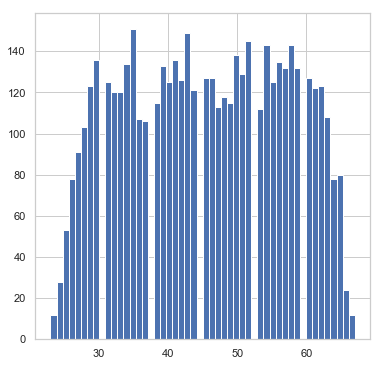

In [295]:
bank_data['Age'].hist(stacked=False, bins=50, figsize=(6,6)) 

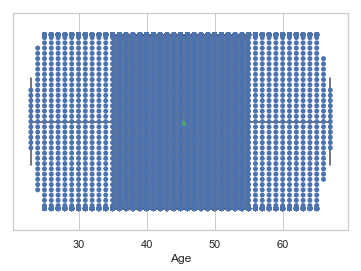

In [296]:
#sns.set(style="whitegrid")
ax = sns.boxplot(x=bank_data['Age'], showmeans=True)
ax = sns.swarmplot(x=bank_data['Age'])

### 3.3.2 For Experience attribute

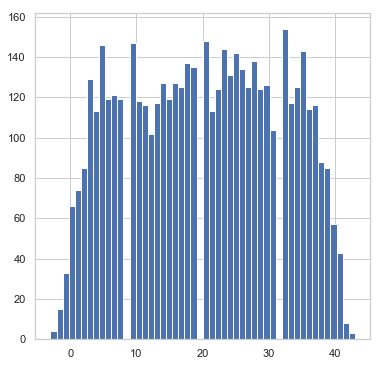

In [297]:
bank_data['Experience'].hist(stacked=False, bins=50, figsize=(6,6)) 

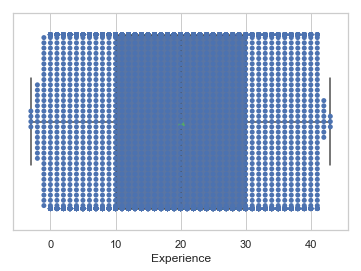

In [298]:
ax = sns.boxplot(x=bank_data['Experience'], showmeans=True)
ax = sns.swarmplot(x=bank_data['Experience'])

### 3.3.3 For CCAvg attribute

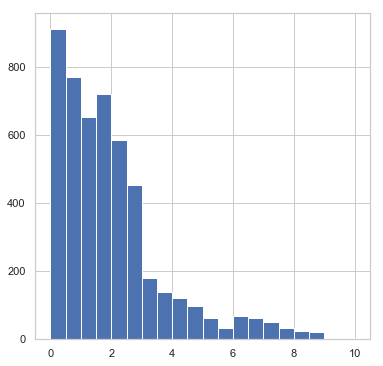

In [248]:
bank_data['CCAvg'].hist(stacked=False, bins=20, figsize=(6,6)) 

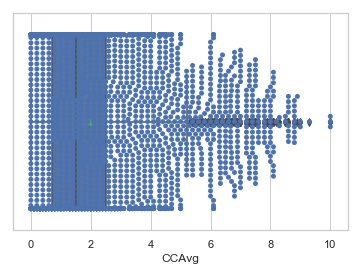

In [249]:
ax = sns.boxplot(x=bank_data['CCAvg'], showmeans=True)
ax = sns.swarmplot(x=bank_data['CCAvg'])

# 3.4 Bivariate Analysis

### 3.4.1 Pair Plot

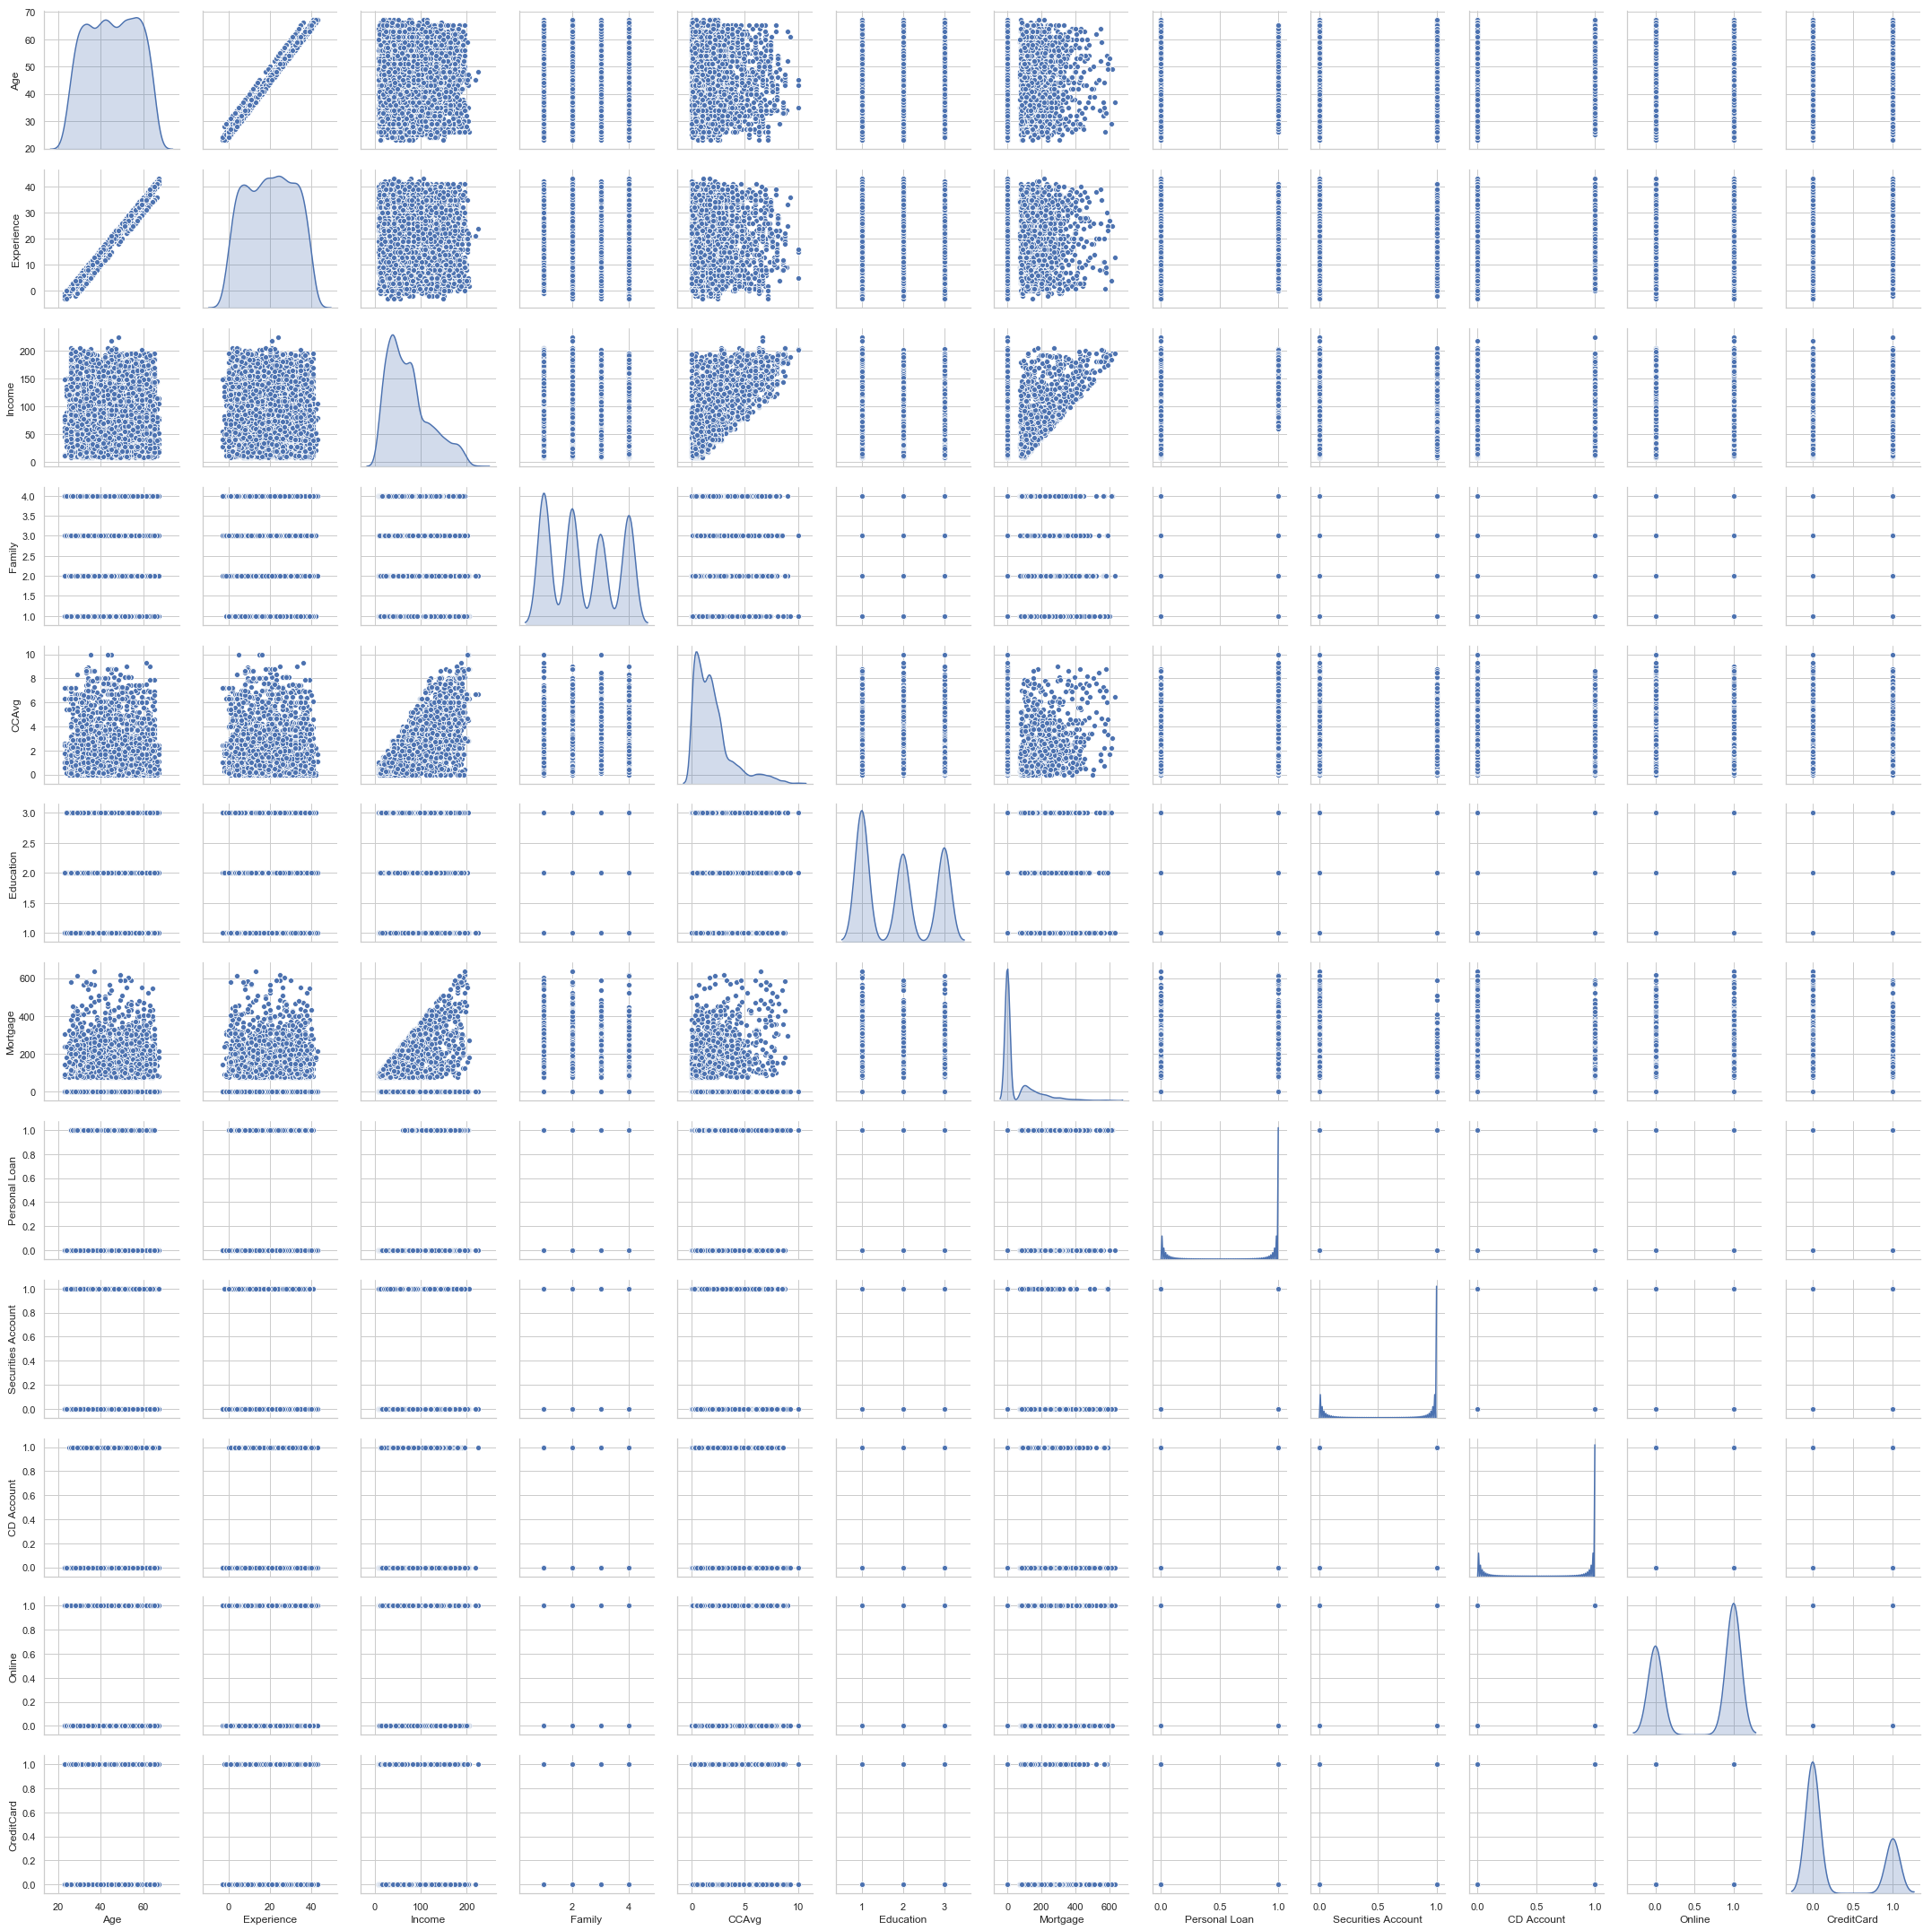

In [299]:
sns.pairplot(bank_data[['Age','Experience','Income','Family','CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']], diag_kind='kde')

### 3.4.2 Check the average of attributes of the credit card holders

In [300]:
average = lambda x : np.mean(x)
pd.pivot_table(bank_data[['CreditCard', 'Personal Loan', 'Age', 'Experience', 'Income', "Securities Account", "CD Account"]], index=['CreditCard', 'Personal Loan'],aggfunc=average)

Age  Experience      Income
CreditCard Personal Loan                                   
0          0              45.325399   20.084247   66.391168
           1              44.866469   19.602374  144.468843
1          0              45.467973   20.247928   65.867370
           1              45.538462   20.412587  145.398601

In [301]:
sum_up = lambda x : np.sum(x)
pd.pivot_table(bank_data[['CreditCard', 'Personal Loan', 'Age', 'Experience', 'Income', "Securities Account", "CD Account"]], index=['CreditCard', 'Personal Loan'],aggfunc=sum_up)

Age  Experience  Income
CreditCard Personal Loan                            
0          0              144724       64129  211987
           1               15120        6606   48686
1          0               60336       26869   87406
           1                6512        2919   20792

In [302]:
#sns.boxplot(x='Age',y='Income',hue='Personal Loan',data=bank_data)
bank_data.describe()

,ID,Age,Experience,Income,ZIP Code,CCAvg,Education,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,1.937938,1.881000,56.498800
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.747659,0.839869,101.713802
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,0.000000,1.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,0.700000,1.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,1.500000,2.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,2.500000,3.000000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,10.000000,3.000000,635.000000


# 4. Train the data

In [305]:
from sklearn.model_selection import train_test_split

X = pdata.drop(["ID", "CreditCard", "ZIP Code"], axis=1)     # Predictor feature columns (8 X m)
Y = pdata['CreditCard']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
1334,47,22,35,2,1.3,1,0,0,0,0,1
4768,38,14,39,1,2.0,2,0,0,0,0,1
65,59,35,131,1,3.8,1,0,0,0,0,1
177,29,3,65,4,1.8,2,244,0,0,0,0
4489,39,13,21,3,0.2,2,0,0,0,0,1


In [306]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

         0        1         2         3         4         5        6  \
0 -0.02694  0.02862 -0.000437  0.033668 -0.005977 -0.032845 -0.00047   

          7         8         9        10  intercept  
0 -0.968492 -1.120318  3.418059 -0.251034  -0.065641  


In [307]:
model_score = model.score(x_test, y_test)
print(model_score)

0.746


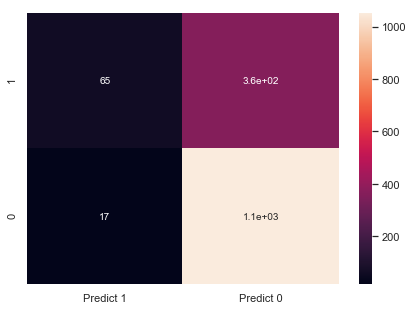

In [308]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)